In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.pyplot import Line2D
from matplotlib.patches import Patch, Rectangle
# mpl.rcParams['font.family'] = 'Liberation Sans'

In [2]:
# def get_legend_y(stand_age, forest_type):
#     if stand_age == 40:
#         if forest_type == 'natreg':
#             return 0.75
#         if forest_type == 'conifer':
#             return 0.4
#     if stand_age == 80:
#         if forest_type == 'natreg':
#             return 0.75
#         if forest_type == 'conifer':
#             return 0.4

### select start stand age & forest type

In [3]:
# stand_age = 47
stand_age = 37.5

In [2]:
forest_type = 'tropical_humid'
forest_type_full = 'Planted (tropical humid) broadleaf forest excl. Euc/Teak'

In [5]:
sample_design = 'SRS'

### read in data & rescale from tonne to million tonne

In [6]:
data = pd.read_csv('../results/C_'+sample_design+'estimate_95ci_loMiUpGrowthFunc_start'+str(stand_age).replace('.', '-')+'_'+forest_type+'.csv')

In [7]:
data.columns = ['index', 'year', 'C', 'C_up', 'C_lo', 'upC', 'upC_up', 'upC_lo', 'loC', 'loC_up', 'loC_lo']

In [8]:
data.head(2)

,index,year,C,C_up,C_lo,upC,upC_up,upC_lo,loC,loC_up,loC_lo
0,carbon2017TropHum,2017,2157.781266,1679.463814,2636.098719,2779.893689,2177.874283,3381.913094,1376.548471,1062.416019,1690.680923
1,carbon2018TropHum,2018,2219.998840,1745.002629,2694.995051,2886.013757,2290.211797,3481.815717,1389.787492,1077.152262,1702.422722


In [9]:
# for c in range(2, data.shape[1]):
#     data.iloc[:, c] = data.iloc[:, c] / 1e6

In [10]:
data.head(2)

,index,year,C,C_up,C_lo,upC,upC_up,upC_lo,loC,loC_up,loC_lo
0,carbon2017TropHum,2017,2157.781266,1679.463814,2636.098719,2779.893689,2177.874283,3381.913094,1376.548471,1062.416019,1690.680923
1,carbon2018TropHum,2018,2219.998840,1745.002629,2694.995051,2886.013757,2290.211797,3481.815717,1389.787492,1077.152262,1702.422722


### plot carbon estimates and uncertainties

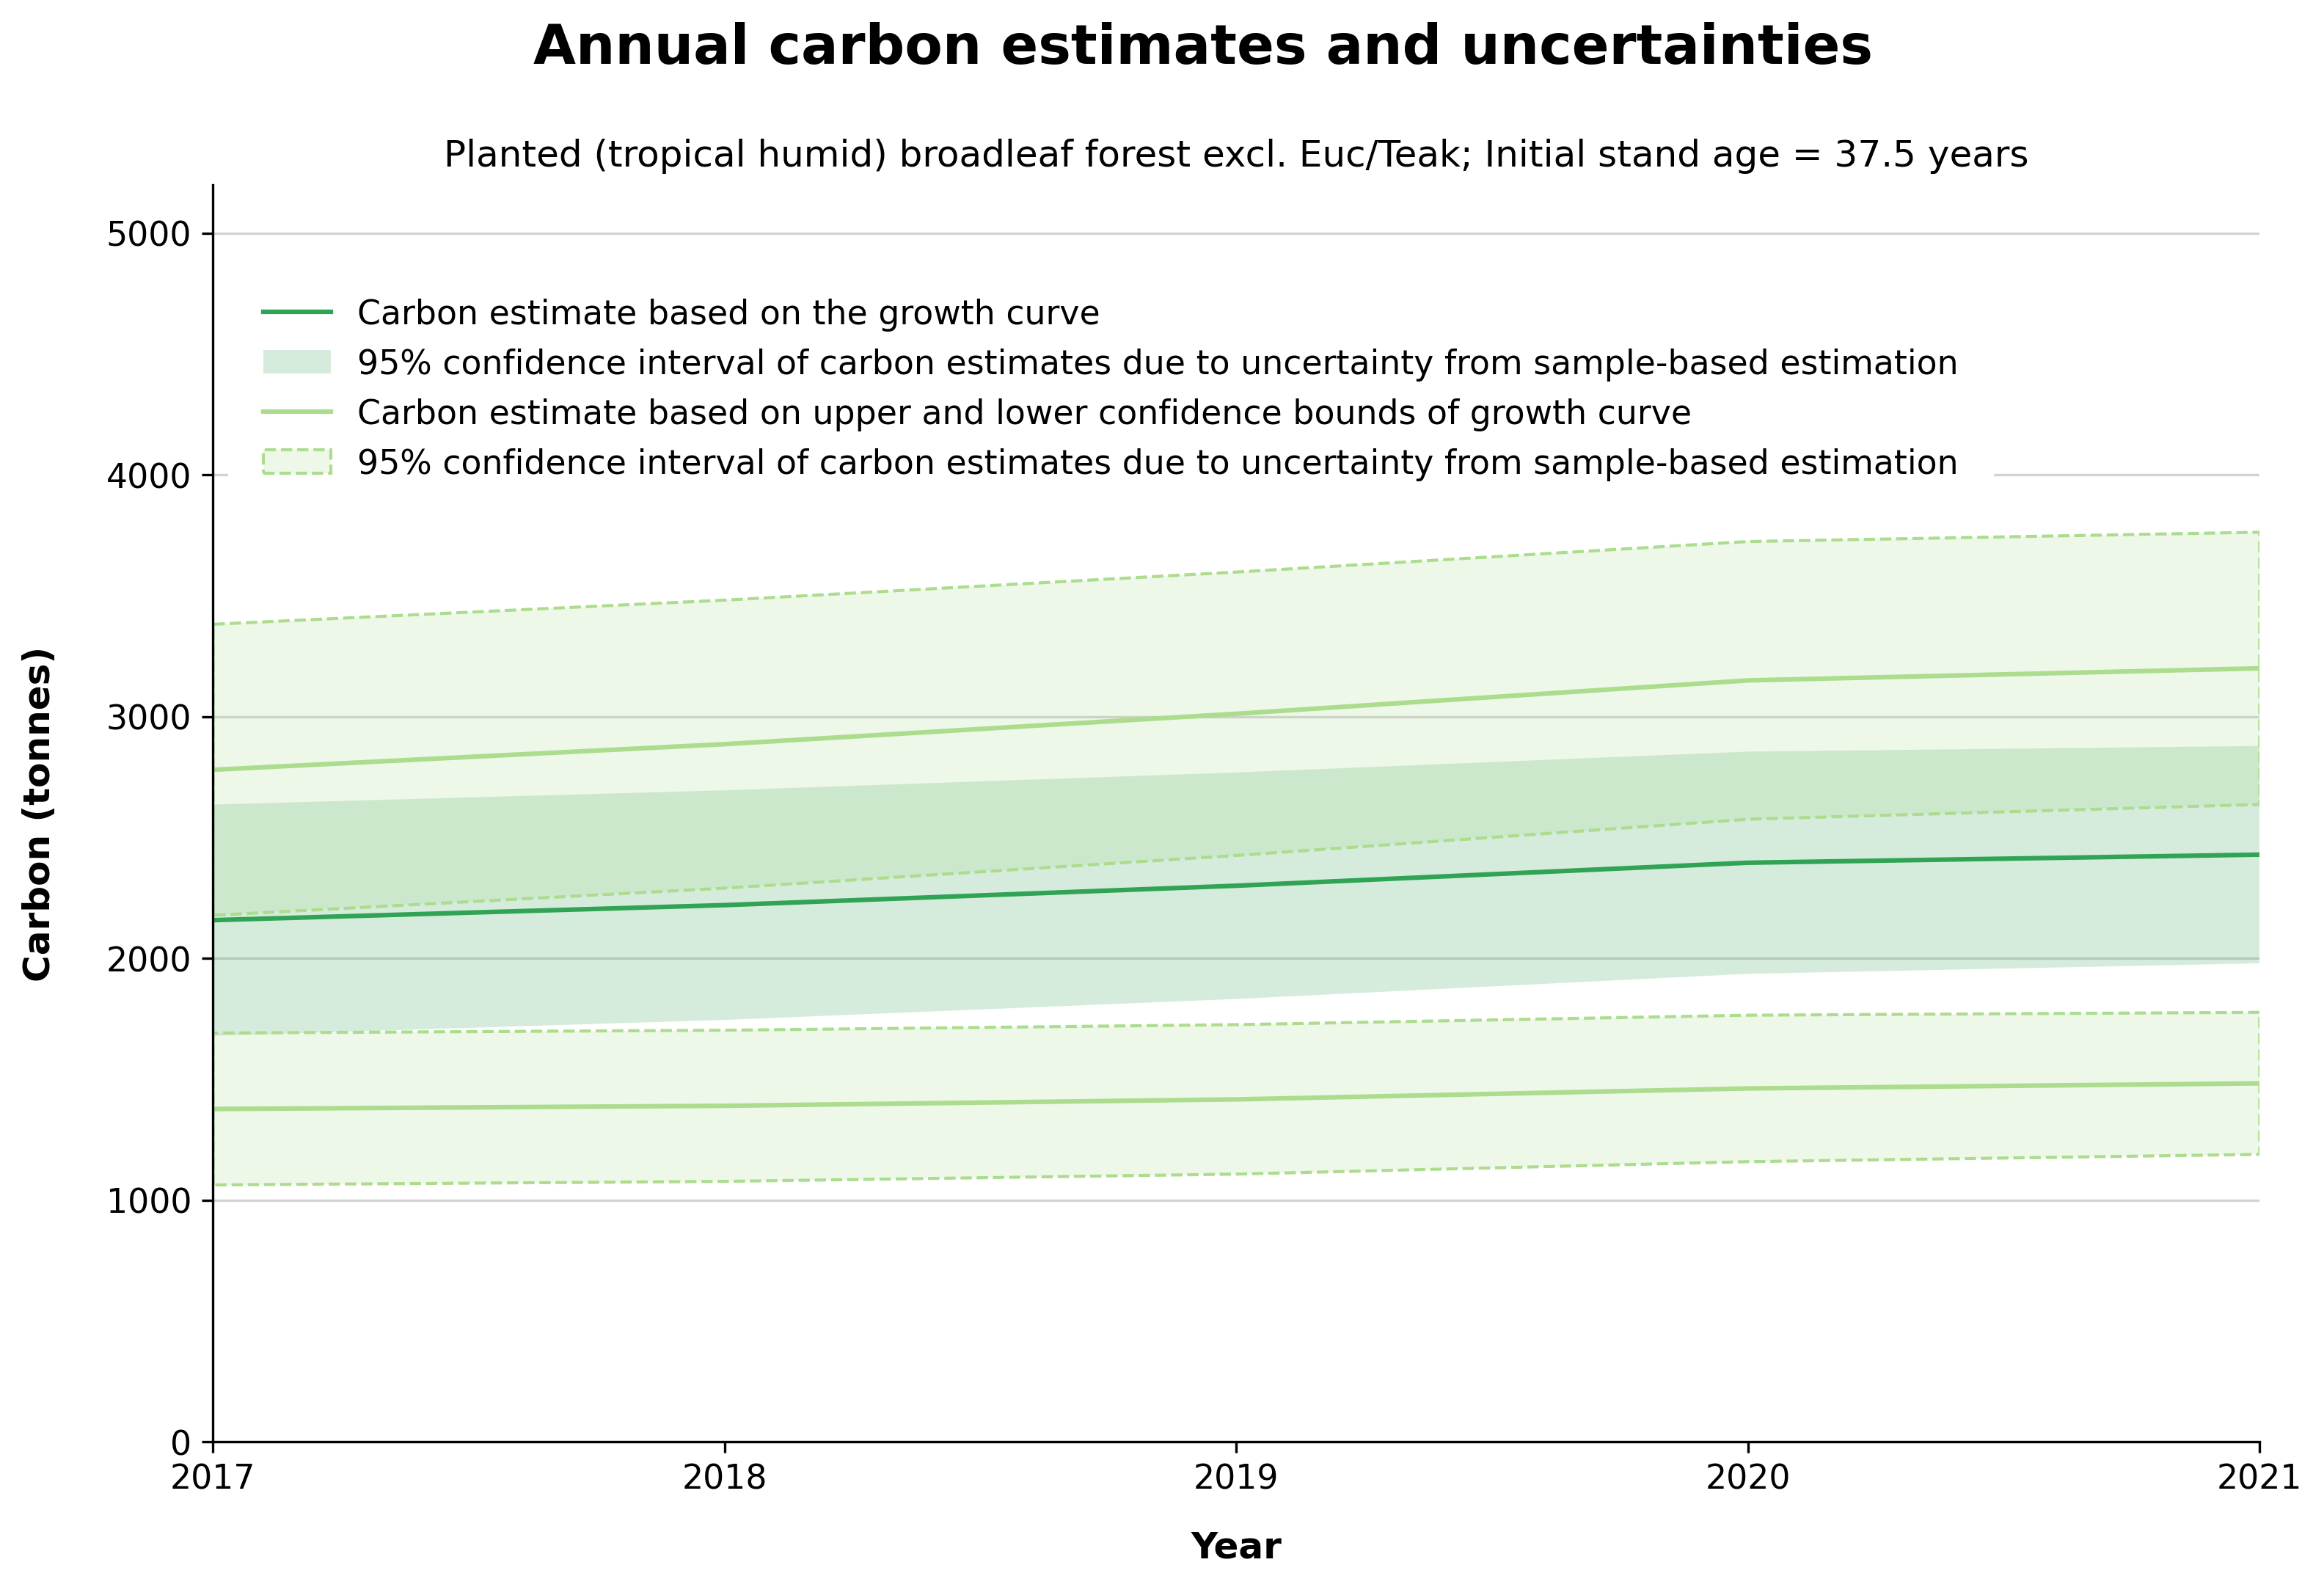

In [13]:
# colors
greens = ['#e5f5e0','#a1d99b','#31a354']  # light 2 dark
yellow2green256 = [list(eval(string[3:])) for string in ['rgb(247,252,185)','rgb(173,221,142)','rgb(49,163,84)']]
yellow2green = [[rgb/256 for rgb in rgb_lst] for rgb_lst in yellow2green256]

# plot
fig, ax = plt.subplots(1, figsize=(12,12*.618), dpi=300)
## estimate
ax.plot(data.year, data.C, color=greens[2], label='Carbon estimate based on the growth curve')
## ci
ax.fill_between(data.year, data.C_lo, data.C_up, 
                alpha=0.2, color=greens[2], edgecolor=None, 
                label='95% confidence interval of carbon estimates due to uncertainty from sample-based estimation')

ax.plot(data.year, data.upC, color=yellow2green[1], 
        label='Carbon estimate based on upper and lower confidence bounds of growth curve')
ax.fill_between(data.year, data.upC_lo, data.upC_up, 
                facecolor=yellow2green[1]+[0.2], edgecolor=yellow2green[1]+[1], 
                linestyle='--', 
                label='95% confidence interval of carbon estimates due to uncertainty from sample-based estimation')

ax.plot(data.year, data.loC, color=yellow2green[1])
ax.fill_between(data.year, data.loC_lo, data.loC_up, 
                facecolor=yellow2green[1]+[0.2], edgecolor=yellow2green[1]+[1], 
                linestyle='--')
# aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', color='lightgrey')
ax.set_axisbelow(True)
ax.set_xticks(range(2016,2022,1))
plt.setp(ax.get_xticklabels(), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=11)
ax.set_xlim(2017,2021)
ax.set_ylim(0,5200)
# labels
ax.set_xlabel('Year', labelpad=11, fontsize=12, fontweight='bold')
ax.set_ylabel('Carbon (tonnes)', labelpad=16, fontsize=12, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.95), framealpha=1, 
          fontsize=11, facecolor='white', edgecolor='white', borderpad=1)
plt.suptitle('Annual carbon estimates and uncertainties', fontsize=18, fontweight='bold')
plt.title(forest_type_full+'; Initial stand age = '+str(stand_age)+' years')
# save figure
plt.savefig('../results/C_'+sample_design+'estimate_ci_start'+str(stand_age).replace('.', '-')+'_'+forest_type+'.png',
           bbox_inches='tight', facecolor='white')

old code

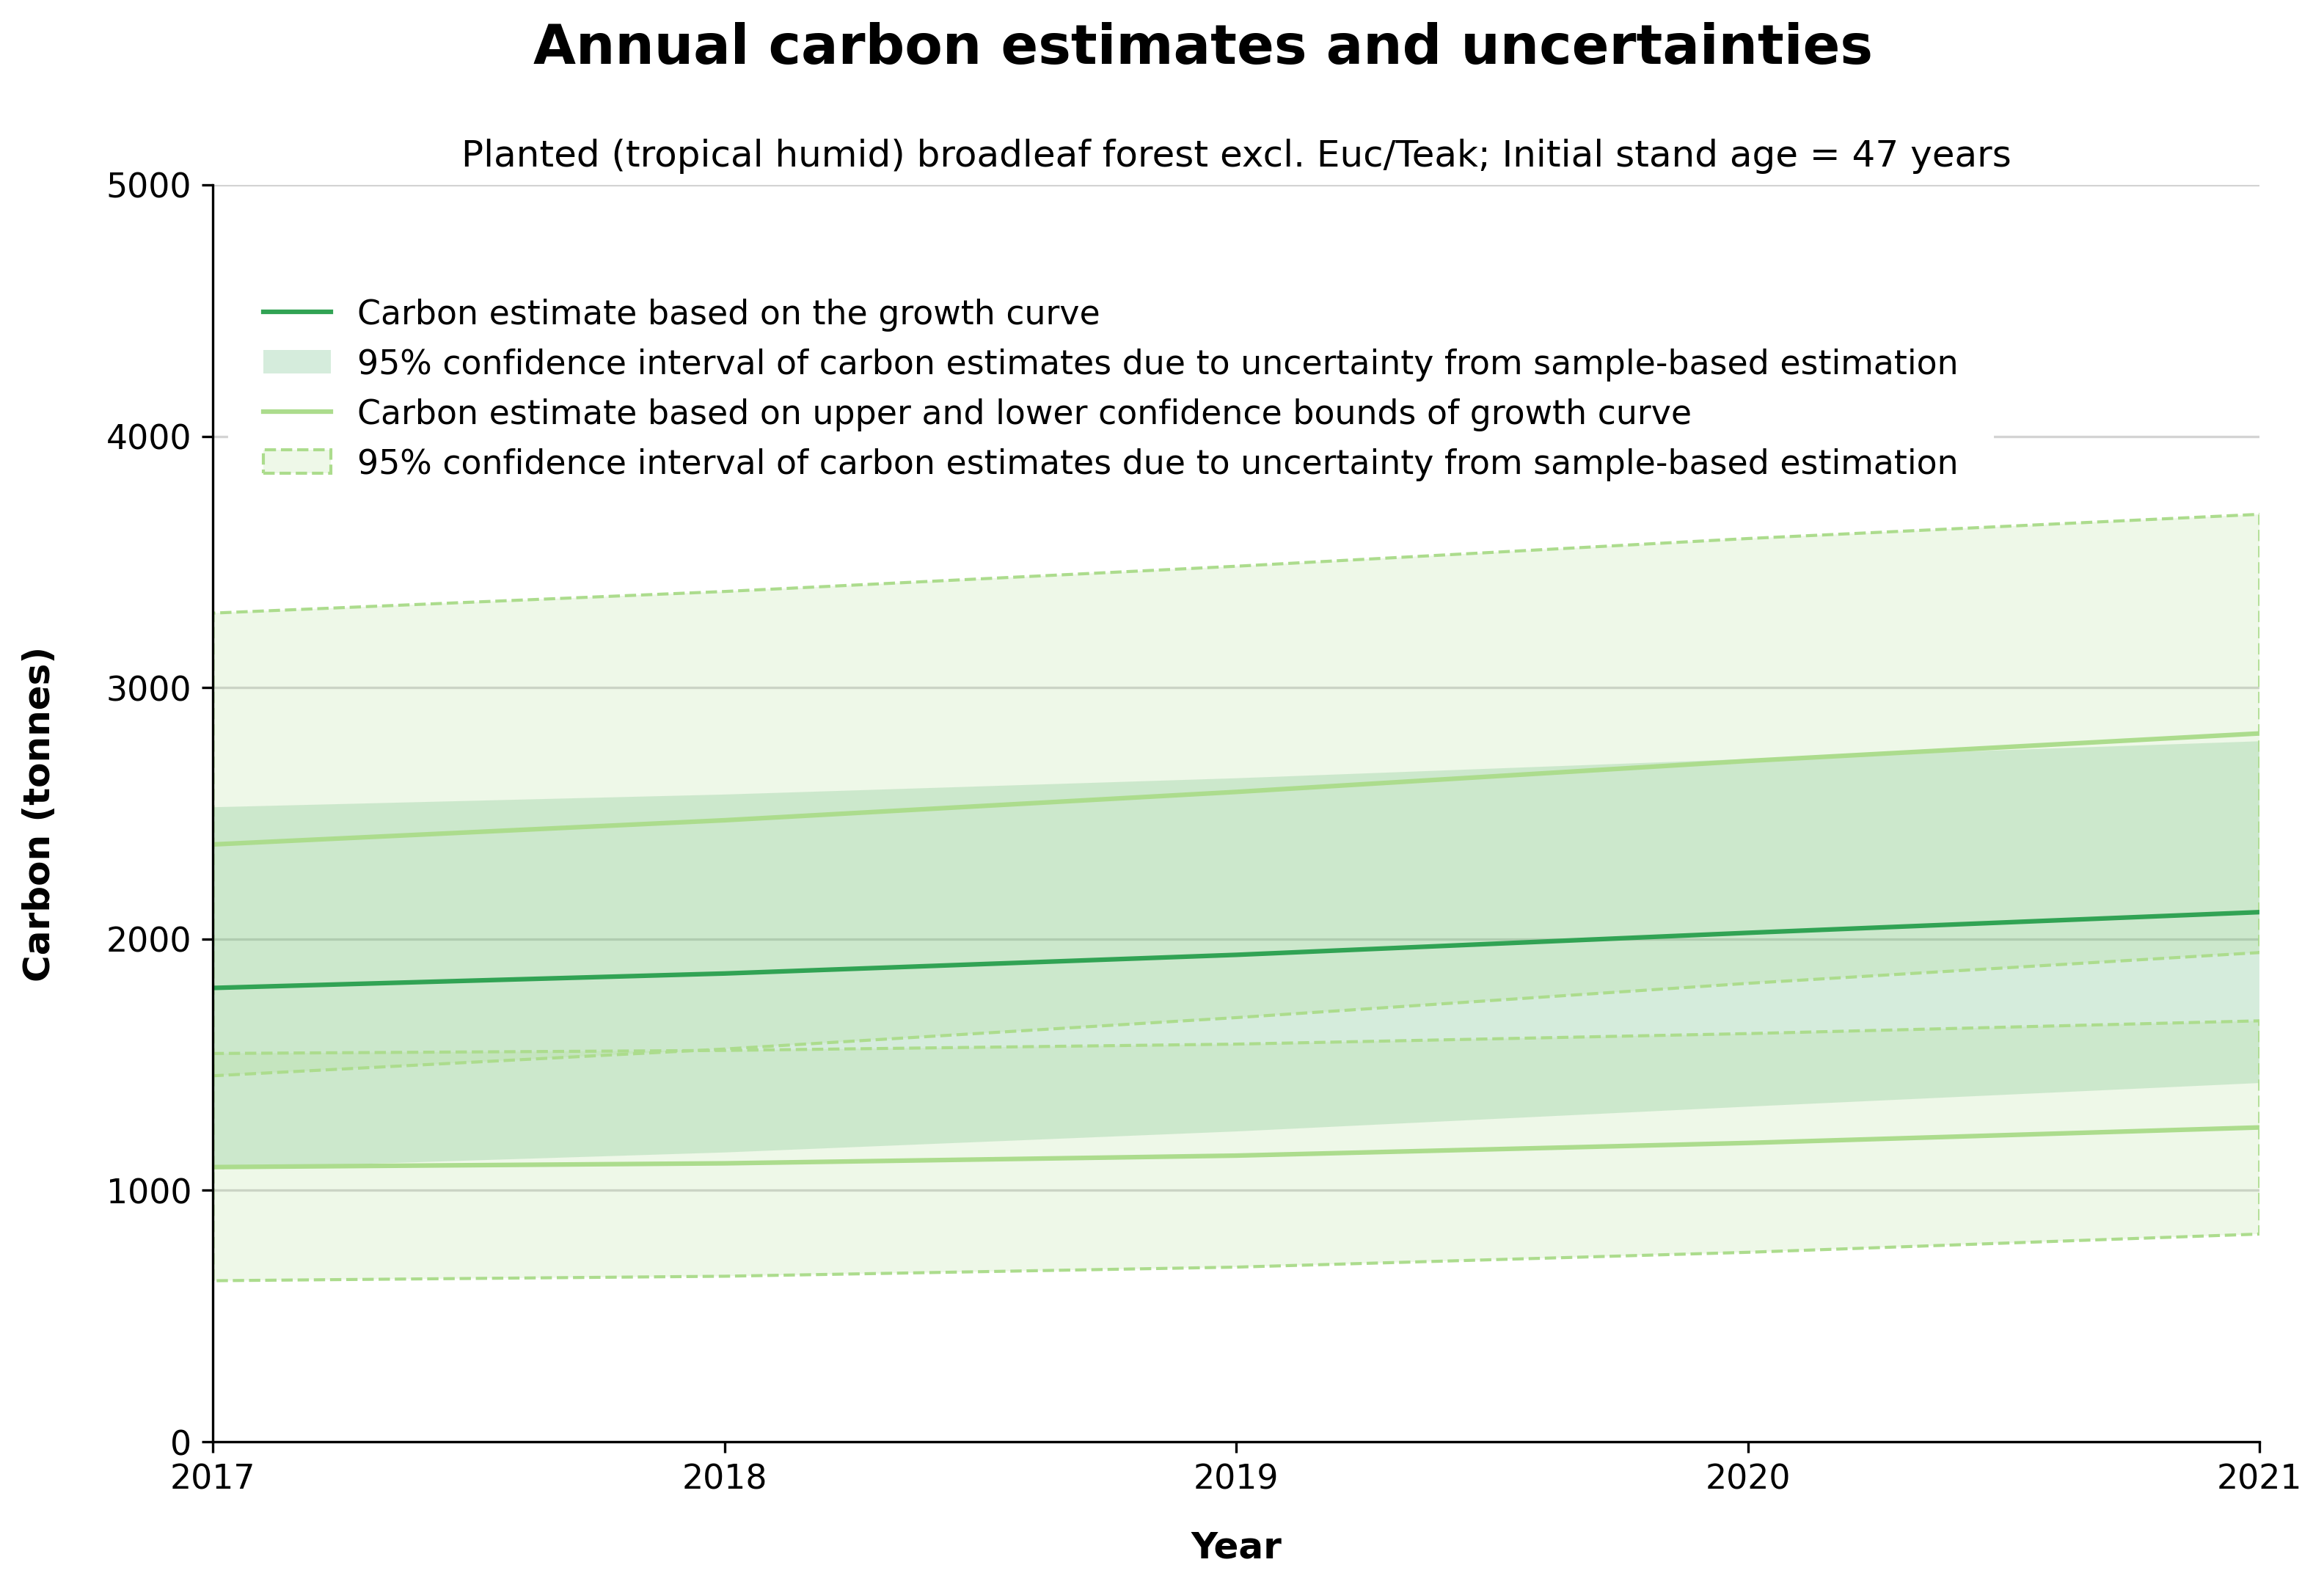

In [22]:
# colors
greens = ['#e5f5e0','#a1d99b','#31a354']  # light 2 dark
yellow2green256 = [list(eval(string[3:])) for string in ['rgb(247,252,185)','rgb(173,221,142)','rgb(49,163,84)']]
yellow2green = [[rgb/256 for rgb in rgb_lst] for rgb_lst in yellow2green256]

# plot
fig, ax = plt.subplots(1, figsize=(12,12*.618), dpi=300)
## estimate
ax.plot(data.year, data.C, color=greens[2], label='Carbon estimate based on the growth curve')
## ci
ax.fill_between(data.year, data.C_lo, data.C_up, 
                alpha=0.2, color=greens[2], edgecolor=None, 
                label='95% confidence interval of carbon estimates due to uncertainty from sample-based estimation')

ax.plot(data.year, data.upC, color=yellow2green[1], 
        label='Carbon estimate based on upper and lower confidence bounds of growth curve')
ax.fill_between(data.year, data.upC_lo, data.upC_up, 
                facecolor=yellow2green[1]+[0.2], edgecolor=yellow2green[1]+[1], 
                linestyle='--', 
                label='95% confidence interval of carbon estimates due to uncertainty from sample-based estimation')

ax.plot(data.year, data.loC, color=yellow2green[1])
ax.fill_between(data.year, data.loC_lo, data.loC_up, 
                facecolor=yellow2green[1]+[0.2], edgecolor=yellow2green[1]+[1], 
                linestyle='--')
# aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', color='lightgrey')
ax.set_axisbelow(True)
ax.set_xticks(range(2016,2022,1))
plt.setp(ax.get_xticklabels(), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=11)
ax.set_xlim(2017,2021)
ax.set_ylim(0,5000)
# labels
ax.set_xlabel('Year', labelpad=11, fontsize=12, fontweight='bold')
ax.set_ylabel('Carbon (tonnes)', labelpad=16, fontsize=12, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.95), framealpha=1, 
          fontsize=11, facecolor='white', edgecolor='white', borderpad=1)
plt.suptitle('Annual carbon estimates and uncertainties', fontsize=18, fontweight='bold')
plt.title(forest_type_full+'; Initial stand age = '+str(stand_age)+' years')
# save figure
plt.savefig('../results/C_estimate_ci_start'+str(stand_age)+'_'+forest_type+'.png',
           bbox_inches='tight', facecolor='white')